<a href="https://colab.research.google.com/github/LieCOS/liecos.github.io/blob/master/HW2_Hard_Soft_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import urllib

#1.	Artificial datasets

##A.	Draw an artificial dataset consisting of two features and two clusters under the following constraints and explain what each constraint means. 

###Define data making func

In [0]:
def init_data(mean, cov, num):
  # Create some normally distributed data
  x, y = np.random.multivariate_normal(mean, cov, num).T
  z = np.ones(num).T
  return x, y, z

###Define plot func

In [0]:
def plot_dist(data_1, data_2):
  x = np.concatenate((data_1[0],data_2[0]))
  y = np.concatenate((data_1[1],data_2[1]))

  x_r = np.concatenate((data_1[0][np.where(data_1[2]==0)],data_2[0][np.where(data_2[2]==0)]))
  y_r = np.concatenate((data_1[1][np.where(data_1[2]==0)],data_2[1][np.where(data_2[2]==0)]))
  
  x_b = np.concatenate((data_1[0][np.where(data_1[2]==1)],data_2[0][np.where(data_2[2]==1)]))
  y_b = np.concatenate((data_1[1][np.where(data_1[2]==1)],data_2[1][np.where(data_2[2]==1)]))
  
  # Set up the axes with gridspec
  fig = plt.figure(figsize=(5, 5))
  grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
  main_ax = fig.add_subplot(grid[:-1, 1:])
  y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
  x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

  # Scatter points on the main axes
  main_ax.plot(x_r, y_r, 'ro', markersize=3, alpha=.5)
  main_ax.plot(x_b, y_b, 'bo', markersize=3, alpha=.5)
  
  # Histogram on the attached axes
  x_hist.hist(x, 40, histtype='stepfilled',
              orientation='vertical')#, color='gray')
  x_hist.invert_yaxis()

  y_hist.hist(y, 40, histtype='stepfilled',
              orientation='horizontal')#, color='gray')
  y_hist.invert_xaxis()
  
  plt.draw()

###i.	“Balanced” and “spherical”

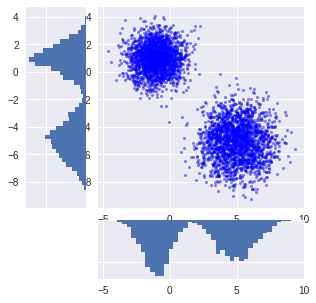

In [4]:
# data = (mean, [var], num)
data_1 = init_data([-1,1],[[1, 0], [0, 1]],2000)
data_2 = init_data([5, -5],[[2, 0], [0, 2]],2000)
plot_dist(data_1,data_2)

###ii.	“Imbalanced” and “spherical”

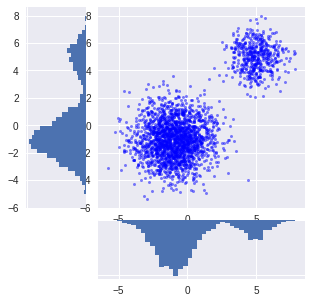

In [5]:
# data = (mean, [var], num)
data_1 = init_data([5,5],[[1, 0], [0, 1]],500)
data_2 = init_data([-1, -1],[[2, 0], [0, 2]],2000)
plot_dist(data_1,data_2)

###iii.	“Balanced” and “non-spherical”

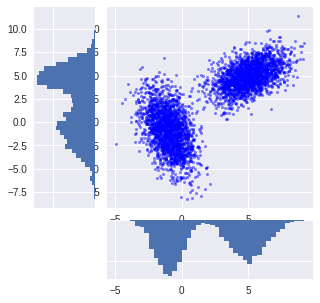

In [6]:
# data = (mean, [var], num)
data_1 = init_data([5,5],[[2, 1], [1, 2]],2000)
data_2 = init_data([-1, -1],[[1, -1], [-1, 5]],2000)
plot_dist(data_1,data_2)

###iv.	“Imbalanced” and “non-spherical variance”

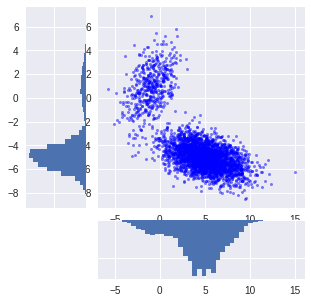

In [7]:
# data = (mean, [var], num)
data_1 = init_data([-1,1],[[2, 1], [1, 3]],500)
data_2 = init_data([5, -5],[[5, -1], [-1, 1]],3000)
plot_dist(data_1,data_2)

##B.	Run your own hard/soft k-means clustering algorithm on artificial datasets you made.

##hard k-means clustering algorithm on artificial datasets you made.

###Define hard k-means func

In [0]:
def hard_kmeans(data_1, data_2, cluster_num=2, iter=10000):
  # concat. data
  data = np.hstack((data_1,data_2))
  # Get random centers
  x_c = np.random.uniform(np.min(data), np.max(data), cluster_num).T
  y_c = np.random.uniform(np.min(data), np.max(data), cluster_num).T
  centers = np.vstack((x_c,y_c)).T
  for i in range(iter):
    # Calculate distance
    distance = np.linalg.norm(np.subtract(data[:2,:].T, centers[0]),axis=1)
    for cl in range(cluster_num-1):
      distance = np.vstack((distance,np.linalg.norm(np.subtract(data[:2,:].T, centers[cl+1]),axis=1)))
    # Update membership
    data[2,:] = np.argmin(distance,axis=0)
    # Update centers
    for cl in range(cluster_num):
      x_c[cl] = np.average(data[0,data[2,:]==cl])
      y_c[cl] = np.average(data[1,data[2,:]==cl])
    centers_before = centers
    centers = np.vstack((x_c,y_c)).T
    if i == 0:
      # Plot init
      plot_dist(data,data)
    # break condition
    if np.linalg.norm(np.subtract(centers_before,centers)) == 0:
      print('Total interation :', i+1)
      break
  # Plot final result
  plot_dist(data,data)

###i.	“Balanced” and “spherical”

Total interation : 4


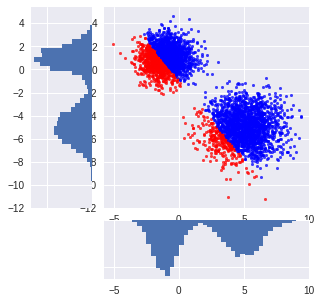

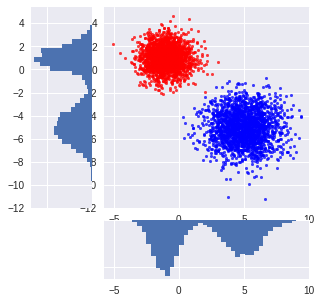

In [24]:
# data = (mean, [var], num)
data_1 = init_data([-1,1],[[1, 0], [0, 1]],2000)
data_2 = init_data([5, -5],[[2, 0], [0, 2]],2000)
hard_kmeans(data_1,data_2)

###ii.	“Imbalanced” and “spherical”

Total interation : 8


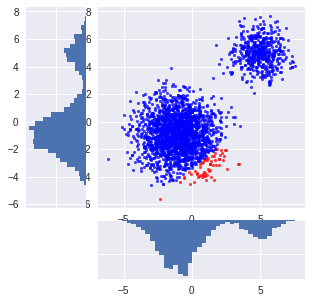

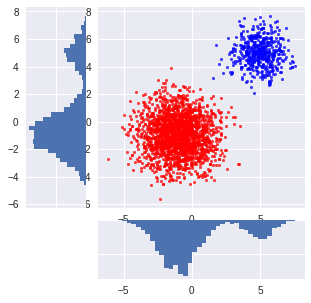

In [10]:
# data = (mean, [var], num)
data_1 = init_data([5,5],[[1, 0], [0, 1]],500)
data_2 = init_data([-1, -1],[[2, 0], [0, 2]],2000)
hard_kmeans(data_1,data_2)

###iii.	“Balanced” and “non-spherical”

Total interation : 5


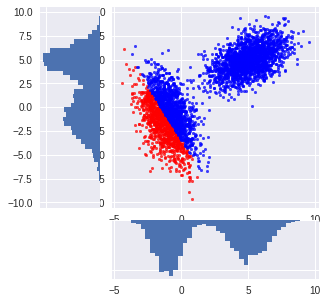

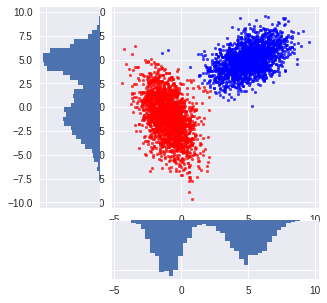

In [11]:
# data = (mean, [var], num)
data_1 = init_data([5,5],[[2, 1], [1, 2]],2000)
data_2 = init_data([-1, -1],[[1, -1], [-1, 5]],2000)
hard_kmeans(data_1,data_2)

###iv.	“Imbalanced” and “non-spherical variance”

Total interation : 8


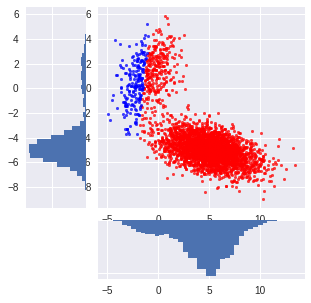

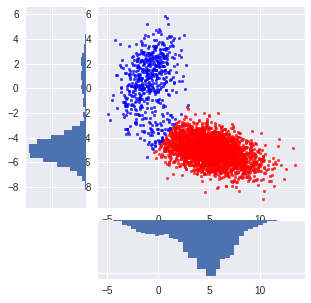

In [12]:
# data = (mean, [var], num)
data_1 = init_data([-1,1],[[2, 1], [1, 3]],500)
data_2 = init_data([5, -5],[[5, -1], [-1, 1]],3000)
hard_kmeans(data_1,data_2)

##Soft k-means clustering algorithm on artificial datasets you made.

###Define data making func

In [0]:
def init_soft_data(mean, cov, num, cluster_num=2):
  # Create some normally distributed data
  x, y = np.random.multivariate_normal(mean, cov, num).T
  z = np.ones((num,cluster_num)).T
  return x, y, z

###Define plot func

In [0]:
def plot_soft_dist(data):
  x = data[0]
  y = data[1]

  x_r = data[0,np.where(np.argmax(data[2:,:],axis=0)==0)]
  y_r = data[1,np.where(np.argmax(data[2:,:],axis=0)==0)]
  rgba_r = np.zeros((x_r.shape[1],4))
  rgba_r[:,0] = 1.0
  rgba_r[:,3] = data[2,np.where(np.argmax(data[2:,:],axis=0)==0)]
  
  x_b = data[0,np.where(np.argmax(data[2:,:],axis=0)==1)]
  y_b = data[1,np.where(np.argmax(data[2:,:],axis=0)==1)]
  rgba_b = np.zeros((x_b.shape[1],4))
  rgba_b[:,2] = 1.0
  rgba_b[:,3] = data[3,np.where(np.argmax(data[2:,:],axis=0)==1)]
  
  # Set up the axes with gridspec
  fig = plt.figure(figsize=(5, 5))
  grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
  main_ax = fig.add_subplot(grid[:-1, 1:])
  y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
  x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

  # Scatter points on the main axes
  main_ax.scatter(x_r, y_r, color=rgba_r)
  main_ax.scatter(x_b, y_b, color=rgba_b)
  
  # Histogram on the attached axes
  x_hist.hist(x, 40, histtype='stepfilled',
              orientation='vertical')#, color='gray')
  x_hist.invert_yaxis()

  y_hist.hist(y, 40, histtype='stepfilled',
              orientation='horizontal')#, color='gray')
  y_hist.invert_xaxis()
  
  plt.draw()

###Define soft k-means func

In [0]:
def soft_kmeans(data_1, data_2, cluster_num=2, beta = 1, iter=1000):
  # concat. data
  data = np.hstack((np.vstack(data_1),np.vstack(data_2)))
  # Get random centers
  x_c = np.random.uniform(np.min(data), np.max(data), cluster_num).T
  y_c = np.random.uniform(np.min(data), np.max(data), cluster_num).T
  centers = np.vstack((x_c,y_c)).T
  for i in range(iter):
    # Calculate distance
    distance = np.linalg.norm(np.subtract(data[:2,:].T, centers[0]),axis=1)
    for cl in range(cluster_num-1):
      distance = np.vstack((distance,np.linalg.norm(np.subtract(data[:2,:].T, centers[cl+1]),axis=1)))
    # Update membership
    for cl in range(cluster_num):
      data[cl+2,:] = np.divide(np.exp(np.multiply(-beta,distance[cl])), np.sum(np.exp(np.multiply(-beta,distance)),axis=0))
    # Update centers
    for cl in range(cluster_num):
      x_c[cl] = np.divide(np.sum(np.multiply(data[0,:],data[cl+2,:])), np.sum(data[cl+2,:]))
      y_c[cl] = np.divide(np.sum(np.multiply(data[1,:],data[cl+2,:])), np.sum(data[cl+2,:]))
    centers_before = centers
    centers = np.vstack((x_c,y_c)).T
    if 0 == i or 1 == i:
      # Plot init
      plot_soft_dist(data)
    # break condition
    if np.linalg.norm(np.subtract(centers_before,centers)) == 0:
      print('Total interation :', i+1)
      break
  # Plot final result
  plot_soft_dist(data)

###i.	“Balanced” and “spherical”

Total interation : 15


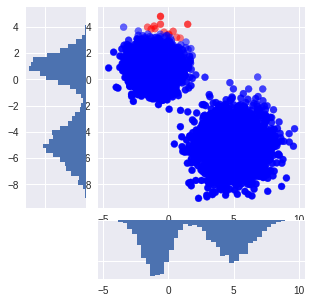

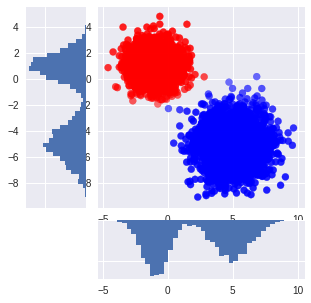

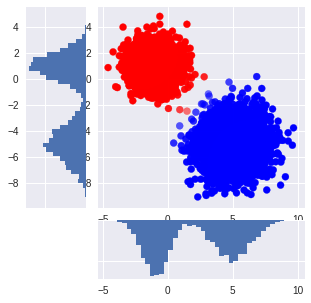

In [26]:
# data = (mean, [var], num)
data_1 = init_soft_data([-1,1],[[1, 0], [0, 1]],2000)
data_2 = init_soft_data([5, -5],[[2, 0], [0, 2]],2000)
soft_kmeans(data_1,data_2)

###ii.	“Imbalanced” and “spherical”

Total interation : 347


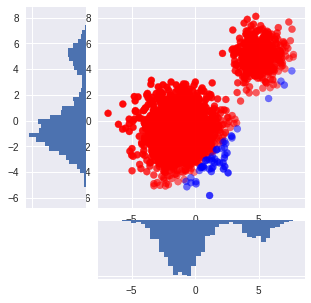

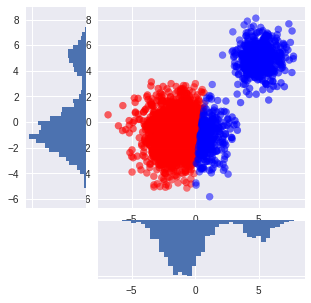

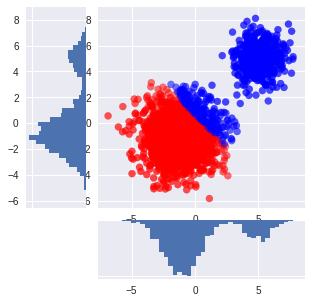

In [25]:
# data = (mean, [var], num)
data_1 = init_soft_data([5,5],[[1, 0], [0, 1]],500)
data_2 = init_soft_data([-1, -1],[[2, 0], [0, 2]],2000)
soft_kmeans(data_1,data_2,beta=0.4)

###iii.	“Balanced” and “non-spherical”

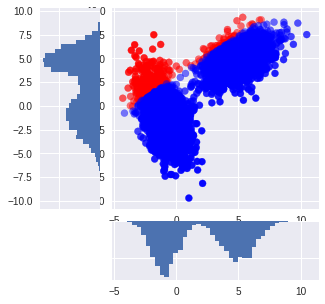

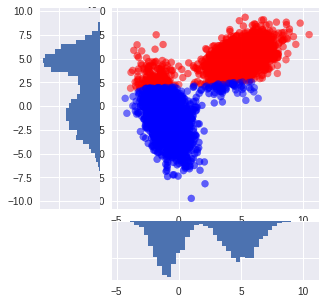

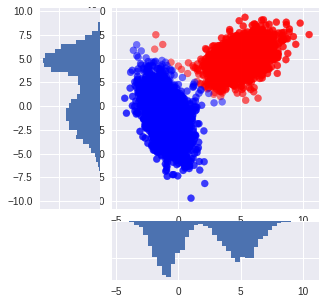

In [18]:
# data = (mean, [var], num)
data_1 = init_soft_data([5,5],[[2, 1], [1, 2]],2000)
data_2 = init_soft_data([-1, -1],[[1, -1], [-1, 5]],2000)
soft_kmeans(data_1,data_2,beta=0.3)

###iv.	“Imbalanced” and “non-spherical variance”

Total interation : 74


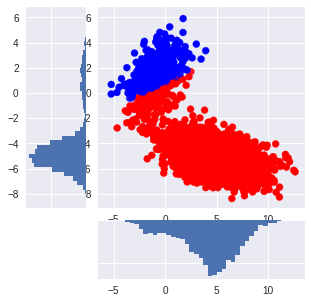

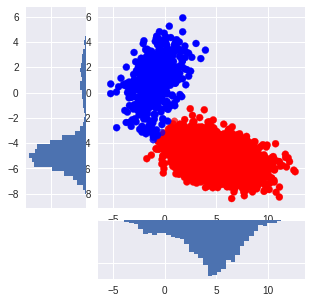

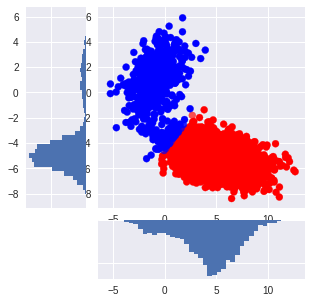

In [19]:
# data = (mean, [var], num)
data_1 = init_soft_data([-1,1],[[2, 1], [1, 3]],500)
data_2 = init_soft_data([5, -5],[[5, -1], [-1, 1]],3000)
soft_kmeans(data_1,data_2,beta=10)

##C.	Describe your findings from the results of B in relation to k-means assumptions. 

As the beta (the stiffness parameter) of the soft k-means gets larger, the soft k-means works like the hard k-means clustering.

#2.	Real datasets (image segmentation)

##A.	Download two “colored jpg image files” (~ 300 x 400 pixels)
* Make sure it is not about two-colored image but two images.

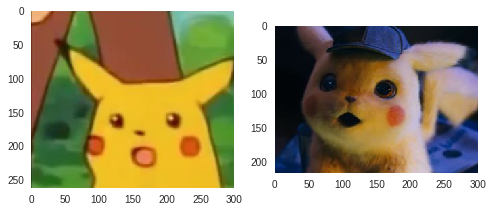

In [20]:
# create a file-like object from the url
pika_SD_f = urllib.request.urlopen("https://en.meming.world/images/en/thumb/6/6e/Surprised_Pikachu.jpg/300px-Surprised_Pikachu.jpg")

# read the image file in a numpy array
pika_SD = plt.imread(pika_SD_f,format='jpg')
plt.subplot(1,2,1)
plt.imshow(pika_SD)
plt.grid(False)

# create a file-like object from the url
pika_HD_f = urllib.request.urlopen("https://en.meming.world/images/en/thumb/4/44/Surprised_Pikachu_Detective.jpg/300px-Surprised_Pikachu_Detective.jpg")

# read the image file in a numpy array
pika_HD = plt.imread(pika_HD_f,format='jpg')
plt.subplot(1,2,2)
plt.imshow(pika_HD)
plt.grid(False)
plt.show()

## B.	Try your hard/soft k-means with at least five different values of k.

###Define hard k-means func

In [0]:
def hard_img_kmeans(data, cluster_num=2, iter=1000):
  # add cluster membership
  data = np.dstack((data, np.zeros((data.shape[0],data.shape[1],1))))
  # Get random centers
  rgb_c = np.random.uniform(0, 255, (3,cluster_num))
  for i in range(iter):
    # Calculate distance
    distance = np.linalg.norm(np.subtract(data[:,:,:3], rgb_c[:,0].T),axis=2)
    for cl in range(cluster_num-1):
      distance = np.dstack((distance,np.linalg.norm(np.subtract(data[:,:,:3], rgb_c[:,cl+1].T),axis=2)))
    # Update membership
    data[:,:,3] = np.argmin(distance,axis=2)
    centers_before = np.copy(rgb_c)
    # Update centers
    for cl in range(cluster_num):
      if np.where(data[:,:,3]==cl)[0].size != 0:
        rgb_c[:,cl] = np.average(data[np.where(data[:,:,3]==cl)],axis=0)[:3]
    # break condition
    if np.linalg.norm(np.subtract(centers_before,rgb_c)) == 0:
      #print('Total interation :', i+1)
      break
  #return rgb_c, data
  img = data[:,:,:3]
  for i in range(data.shape[0]):
    for j in range(data.shape[1]):
      img[i,j,:] = np.divide(rgb_c[:,int(data[i,j,3])],255.0)
  return img

### hard k-means with at least five different values of k.

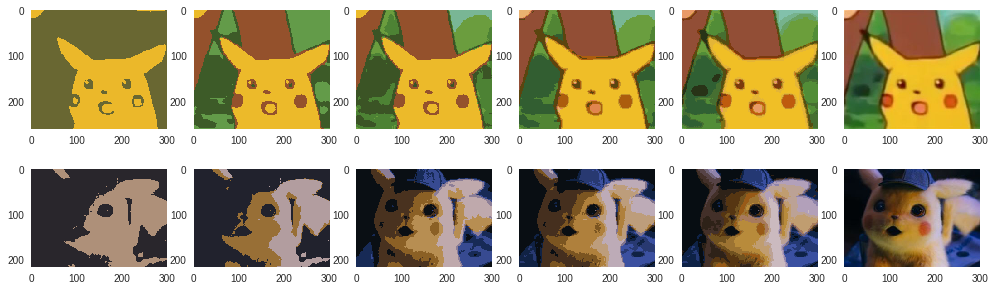

In [22]:
plt.figure(figsize=(17,5))
plt.subplot(2,6,1);plt.imshow(hard_img_kmeans(pika_SD,cluster_num=2));plt.grid(False)
plt.subplot(2,6,2);plt.imshow(hard_img_kmeans(pika_SD,cluster_num=4));plt.grid(False)
plt.subplot(2,6,3);plt.imshow(hard_img_kmeans(pika_SD,cluster_num=8));plt.grid(False)
plt.subplot(2,6,4);plt.imshow(hard_img_kmeans(pika_SD,cluster_num=16));plt.grid(False)
plt.subplot(2,6,5);plt.imshow(hard_img_kmeans(pika_SD,cluster_num=32));plt.grid(False)
plt.subplot(2,6,6);plt.imshow(pika_SD);plt.grid(False)
plt.subplot(2,6,7);plt.imshow(hard_img_kmeans(pika_HD,cluster_num=2));plt.grid(False)
plt.subplot(2,6,8);plt.imshow(hard_img_kmeans(pika_HD,cluster_num=4));plt.grid(False)
plt.subplot(2,6,9);plt.imshow(hard_img_kmeans(pika_HD,cluster_num=8));plt.grid(False)
plt.subplot(2,6,10);plt.imshow(hard_img_kmeans(pika_HD,cluster_num=16));plt.grid(False)
plt.subplot(2,6,11);plt.imshow(hard_img_kmeans(pika_HD,cluster_num=32));plt.grid(False)
plt.subplot(2,6,12);plt.imshow(pika_HD);plt.grid(False)
plt.show()

###i.	At least two different values of hyperparameter of soft k-means.  

###Define soft k-means func

In [0]:
def soft_img_kmeans(data, cluster_num=2, beta=1, iter=10):
  # add cluster membership
  data = np.dstack((data, np.zeros((data.shape[0],data.shape[1],cluster_num))))
  # Get random centers
  rgb_c = np.random.normal(255/2,10, (3,cluster_num))
  for i in range(iter):
    # Calculate distance
    distance = np.linalg.norm(np.subtract(data[:,:,:3], rgb_c[:,0].T),axis=2)
    for cl in range(cluster_num-1):
      distance = np.dstack((distance,np.linalg.norm(np.subtract(data[:,:,:3], rgb_c[:,cl+1].T),axis=2)))
    # Update membership
    # data[:,:,3] = np.argmin(distance,axis=2)
    for cl in range(cluster_num):
      data[:,:,cl+3] = np.divide(np.exp(np.multiply(-beta,distance[:,:,cl])), np.sum(np.exp(np.multiply(-beta,distance[:,:,cl])),axis=0))
    centers_before = np.copy(rgb_c)
    # Update centers
    for cl in range(cluster_num):
      #rgb_c[:,cl] = np.average(data[np.where(data[:,:,3]==cl)],axis=0)[:3]
      rgb_c[0,cl] = np.divide(np.sum(np.multiply(data[:,:,0],data[:,:,cl+3])),np.sum(data[:,:,cl+3]))
      rgb_c[1,cl] = np.divide(np.sum(np.multiply(data[:,:,1],data[:,:,cl+3])),np.sum(data[:,:,cl+3]))
      rgb_c[2,cl] = np.divide(np.sum(np.multiply(data[:,:,2],data[:,:,cl+3])),np.sum(data[:,:,cl+3]))
    # break condition
    if np.linalg.norm(np.subtract(centers_before,rgb_c)) == 0:
      #print('Total interation :', i+1)
      break
  #return rgb_c, data
  img = data[:,:,:3]
  for i in range(data.shape[0]):
    for j in range(data.shape[1]):
      img[i,j,:] = np.divide(rgb_c[:,np.argmax(data[i,j,3:])],255.0)
  return img

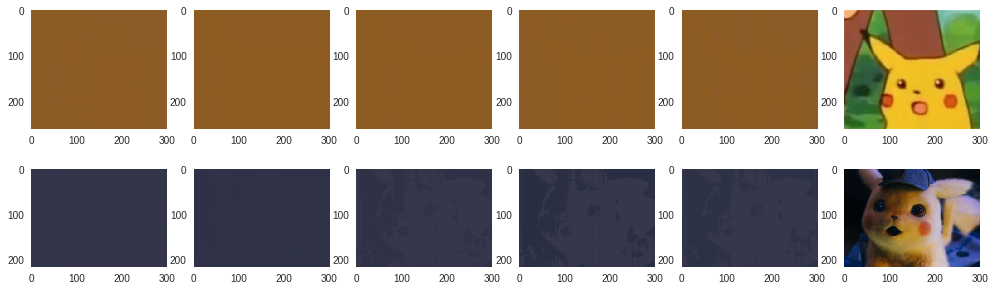

In [186]:
plt.figure(figsize=(17,5))
plt.subplot(2,6,1);plt.imshow(soft_img_kmeans(pika_SD,cluster_num=2,beta=2));plt.grid(False)
plt.subplot(2,6,2);plt.imshow(soft_img_kmeans(pika_SD,cluster_num=4,beta=2));plt.grid(False)
plt.subplot(2,6,3);plt.imshow(soft_img_kmeans(pika_SD,cluster_num=8,beta=2));plt.grid(False)
plt.subplot(2,6,4);plt.imshow(soft_img_kmeans(pika_SD,cluster_num=16,beta=2));plt.grid(False)
plt.subplot(2,6,5);plt.imshow(soft_img_kmeans(pika_SD,cluster_num=32,beta=2));plt.grid(False)
plt.subplot(2,6,6);plt.imshow(pika_SD);plt.grid(False)
plt.subplot(2,6,7);plt.imshow(soft_img_kmeans(pika_HD,cluster_num=2,beta=2));plt.grid(False)
plt.subplot(2,6,8);plt.imshow(soft_img_kmeans(pika_HD,cluster_num=4,beta=2));plt.grid(False)
plt.subplot(2,6,9);plt.imshow(soft_img_kmeans(pika_HD,cluster_num=8,beta=2));plt.grid(False)
plt.subplot(2,6,10);plt.imshow(soft_img_kmeans(pika_HD,cluster_num=16,beta=2));plt.grid(False)
plt.subplot(2,6,11);plt.imshow(soft_img_kmeans(pika_HD,cluster_num=32,beta=2));plt.grid(False)
plt.subplot(2,6,12);plt.imshow(pika_HD);plt.grid(False)
plt.show()

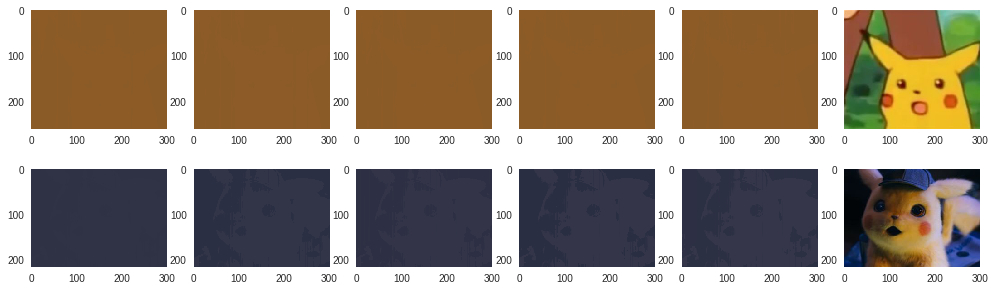

In [187]:
plt.figure(figsize=(17,5))
plt.subplot(2,6,1);plt.imshow(soft_img_kmeans(pika_SD,cluster_num=2,beta=0.5));plt.grid(False)
plt.subplot(2,6,2);plt.imshow(soft_img_kmeans(pika_SD,cluster_num=4,beta=0.5));plt.grid(False)
plt.subplot(2,6,3);plt.imshow(soft_img_kmeans(pika_SD,cluster_num=8,beta=0.5));plt.grid(False)
plt.subplot(2,6,4);plt.imshow(soft_img_kmeans(pika_SD,cluster_num=16,beta=0.5));plt.grid(False)
plt.subplot(2,6,5);plt.imshow(soft_img_kmeans(pika_SD,cluster_num=32,beta=0.5));plt.grid(False)
plt.subplot(2,6,6);plt.imshow(pika_SD);plt.grid(False)
plt.subplot(2,6,7);plt.imshow(soft_img_kmeans(pika_HD,cluster_num=2,beta=0.5));plt.grid(False)
plt.subplot(2,6,8);plt.imshow(soft_img_kmeans(pika_HD,cluster_num=4,beta=0.5));plt.grid(False)
plt.subplot(2,6,9);plt.imshow(soft_img_kmeans(pika_HD,cluster_num=8,beta=0.5));plt.grid(False)
plt.subplot(2,6,10);plt.imshow(soft_img_kmeans(pika_HD,cluster_num=16,beta=0.5));plt.grid(False)
plt.subplot(2,6,11);plt.imshow(soft_img_kmeans(pika_HD,cluster_num=32,beta=0.5));plt.grid(False)
plt.subplot(2,6,12);plt.imshow(pika_HD);plt.grid(False)
plt.show()

##C.	Describe what you found. 